### Data Description

The file "Data - Parkinsons" contains the 195 Parkinson's Disease patients Data. Data includes PD patients characteristic vocal features voice recordings.

### Objective

Goal is to classify the patients into the respective labels using the attributes from their voice recordings

### Import the necessary libraries

In [763]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from numpy import percentile

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

sns.set_style(style='darkgrid')  # Setting the plot style. Purely for aesthetic purposes

import warnings

warnings.simplefilter('ignore')

### 1. Load the dataset

In [764]:
data = pd.read_csv("Data - Parkinsons.csv")
data.head(5)

# data.drop('name', axis=1, inplace = True)    # dropping the name column as it is a ASCII subject name and recording number

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard (5 points)

In [765]:
# data.set_index('name', inplace = True)    # As a personal preference, setting the 'name' column as the index column

In [766]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

- The dataset is of shape (195,24)
- No sign of missing values
- All the columns instead of name column are read as numeric columns (either float or int) 
- Continuous and kinda continuous columns :  MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, RPDE, DFA, spread1, spread2, D2, PPE       
- Categorical columns : status

In [767]:
data.describe().T  # descriptive statistics of each of the attributes

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


Checking unique values

In [768]:
unique_values = data.apply(lambda x: len(x.unique())).to_frame()

unique_values.columns = ['Unique values']
unique_values.reindex()

unique_values

,Unique values
name,195
MDVP:Fo(Hz),195
MDVP:Fhi(Hz),195
MDVP:Flo(Hz),195
MDVP:Jitter(%),173
MDVP:Jitter(Abs),19
MDVP:RAP,155
MDVP:PPQ,165
Jitter:DDP,180
MDVP:Shimmer,188


### 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations

<b>Univariate analysis of each attribute</b>

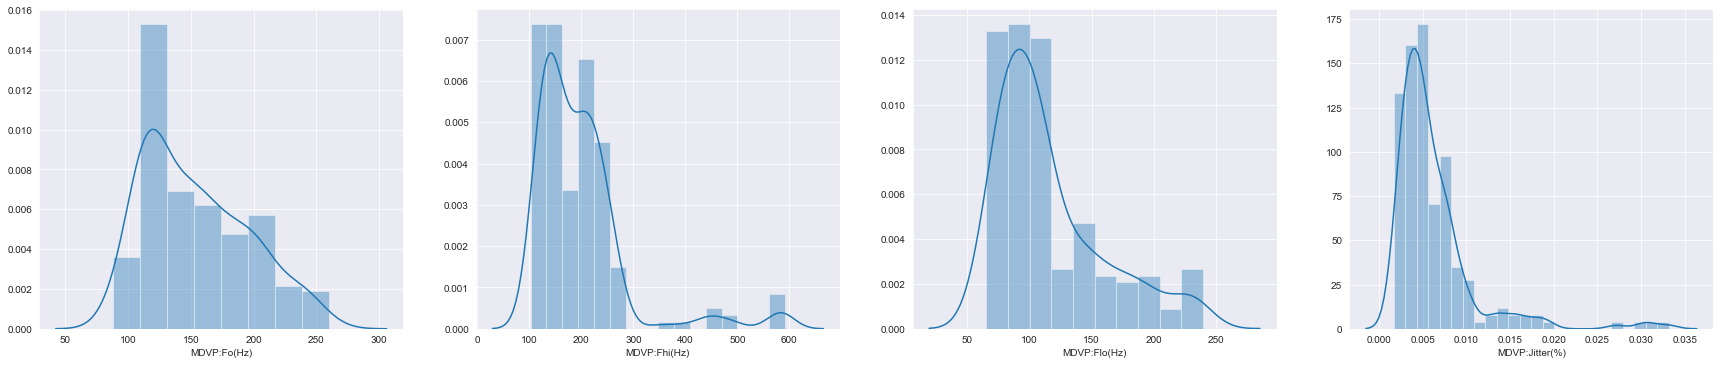

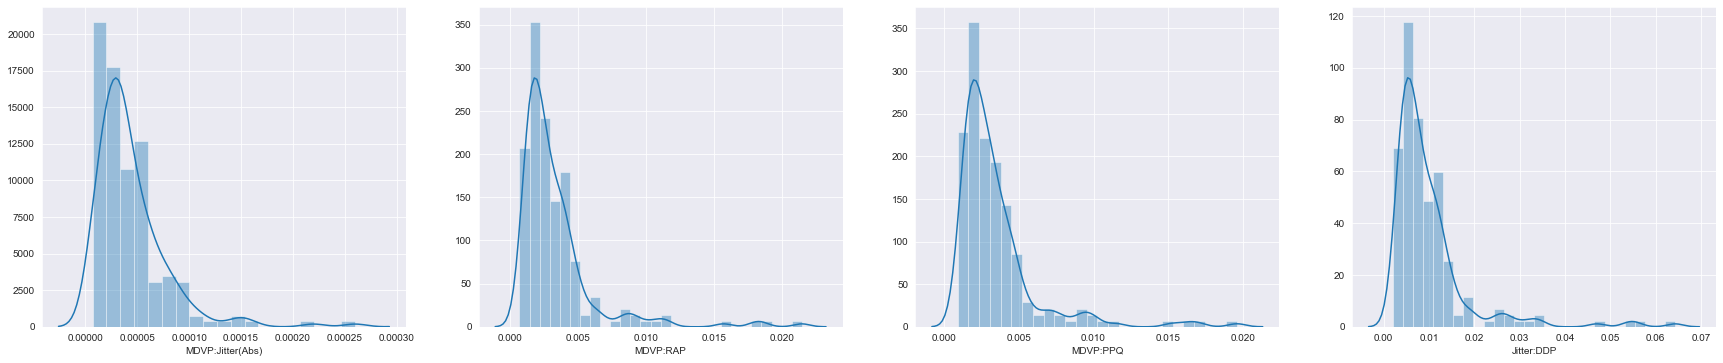

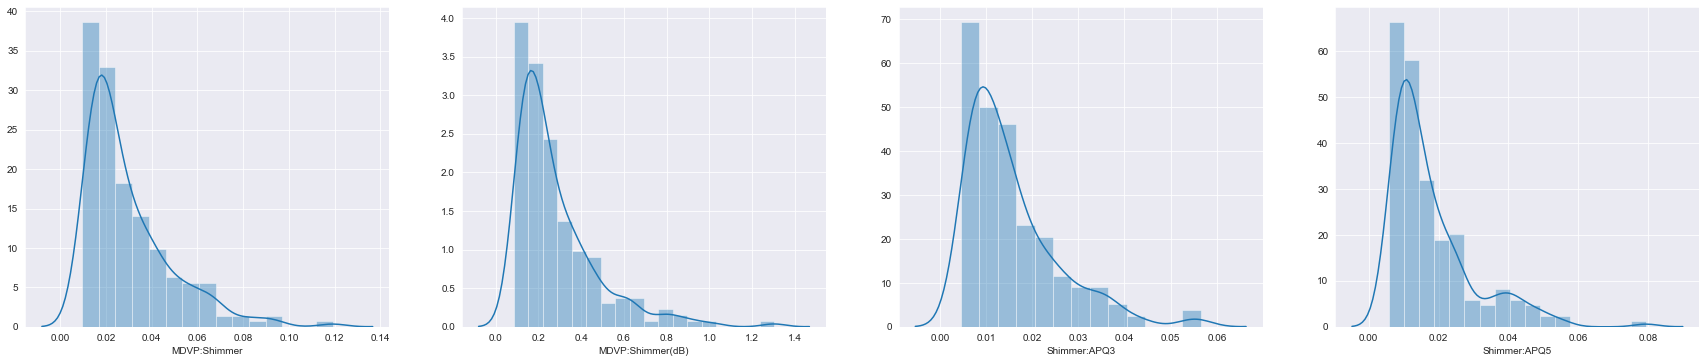

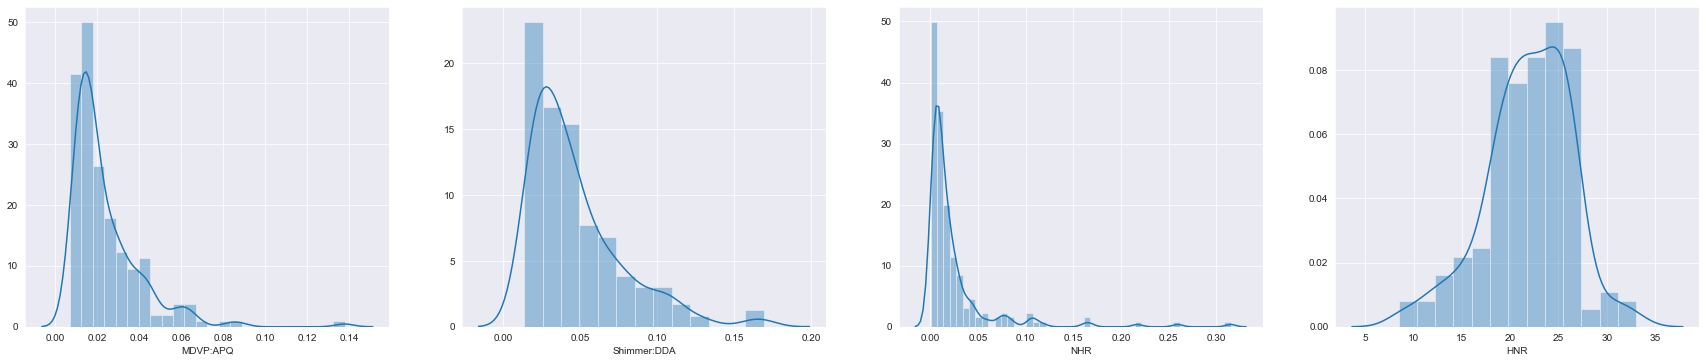

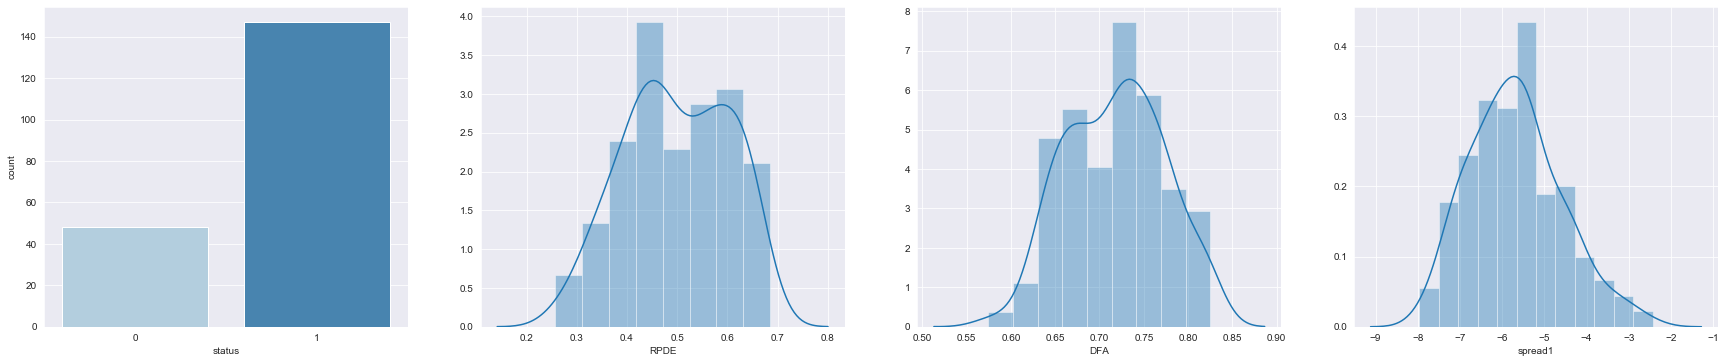

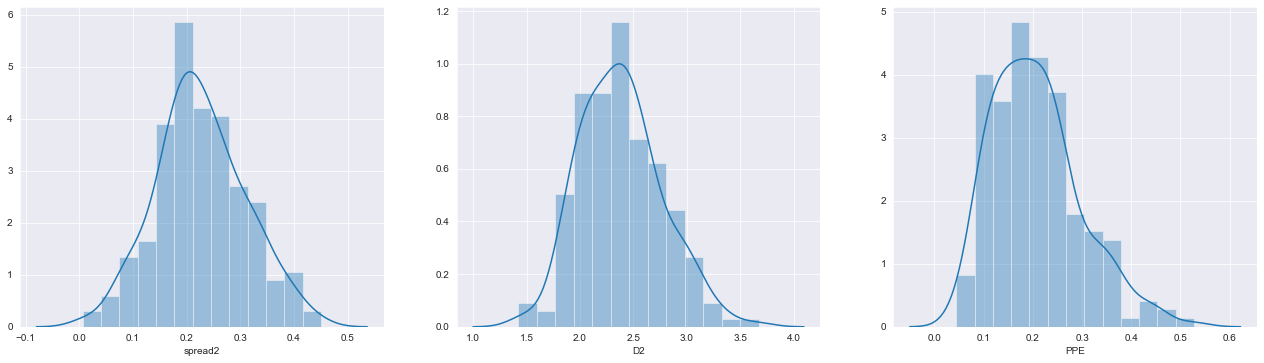

In [769]:
data.drop('name', axis=1, inplace=True)

pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in data.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    if pos == 1:
        plt.figure(figsize= (30,20))  # Set the figure size
        
    plt.subplot(3, 4, pos)   # plot grid
    if feature != 'status':   # Plot histogram for all the continuous columns
        sns.distplot(data[feature], kde= True )
    else:
        sns.countplot(data[feature], palette= 'Blues')    # Plot bar chart for all the categorical columns
    
    pos += 1  # to plot over the grid one by one  
    if pos > 4:
        pos = 1

- Feature <b>MDVP:Fo(Hz)</b> is right skewed and there is no extreme/outlier value. Most of values are between 125 to 150. Mean is very close to median.
- Features <b>MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, PPE</b> are right skewed and there are outlier values.
- Feature <b>HNR</b> is left skewed and there are outlier values.
- Features <b>RPDE, DFA</b> are left skewed and there is no outlier value.
- Features <b>spread1, spread2, D2</b> looks normally distributed but thee are few outlier values.
- <b>status</b>: count of having Parkinson's is more then (zero) - healthy.

<b>Bivariate analysis of each attribute</b>

In [770]:
data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


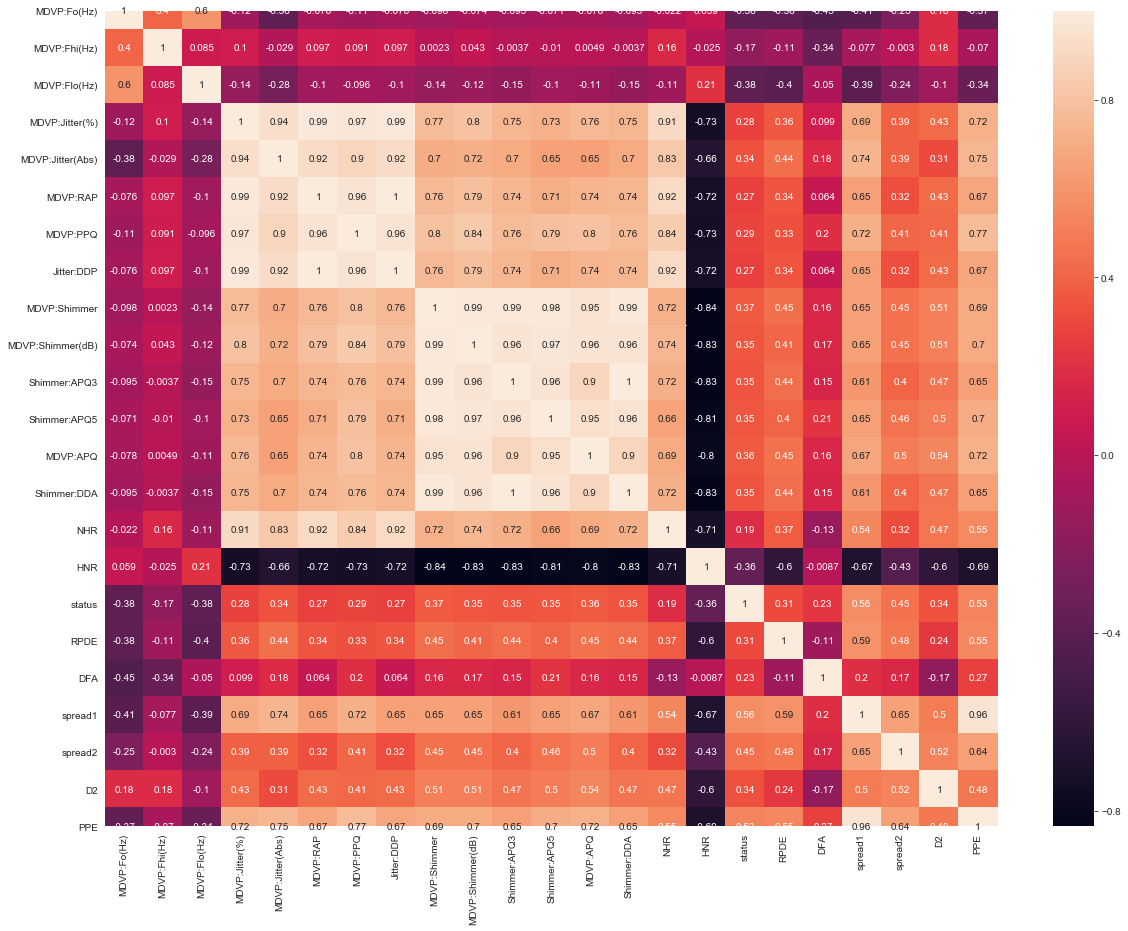

In [771]:
plt.figure(figsize = (20,15))
sns.set_style(style = 'white')
sns.heatmap(data.corr(), annot = True)

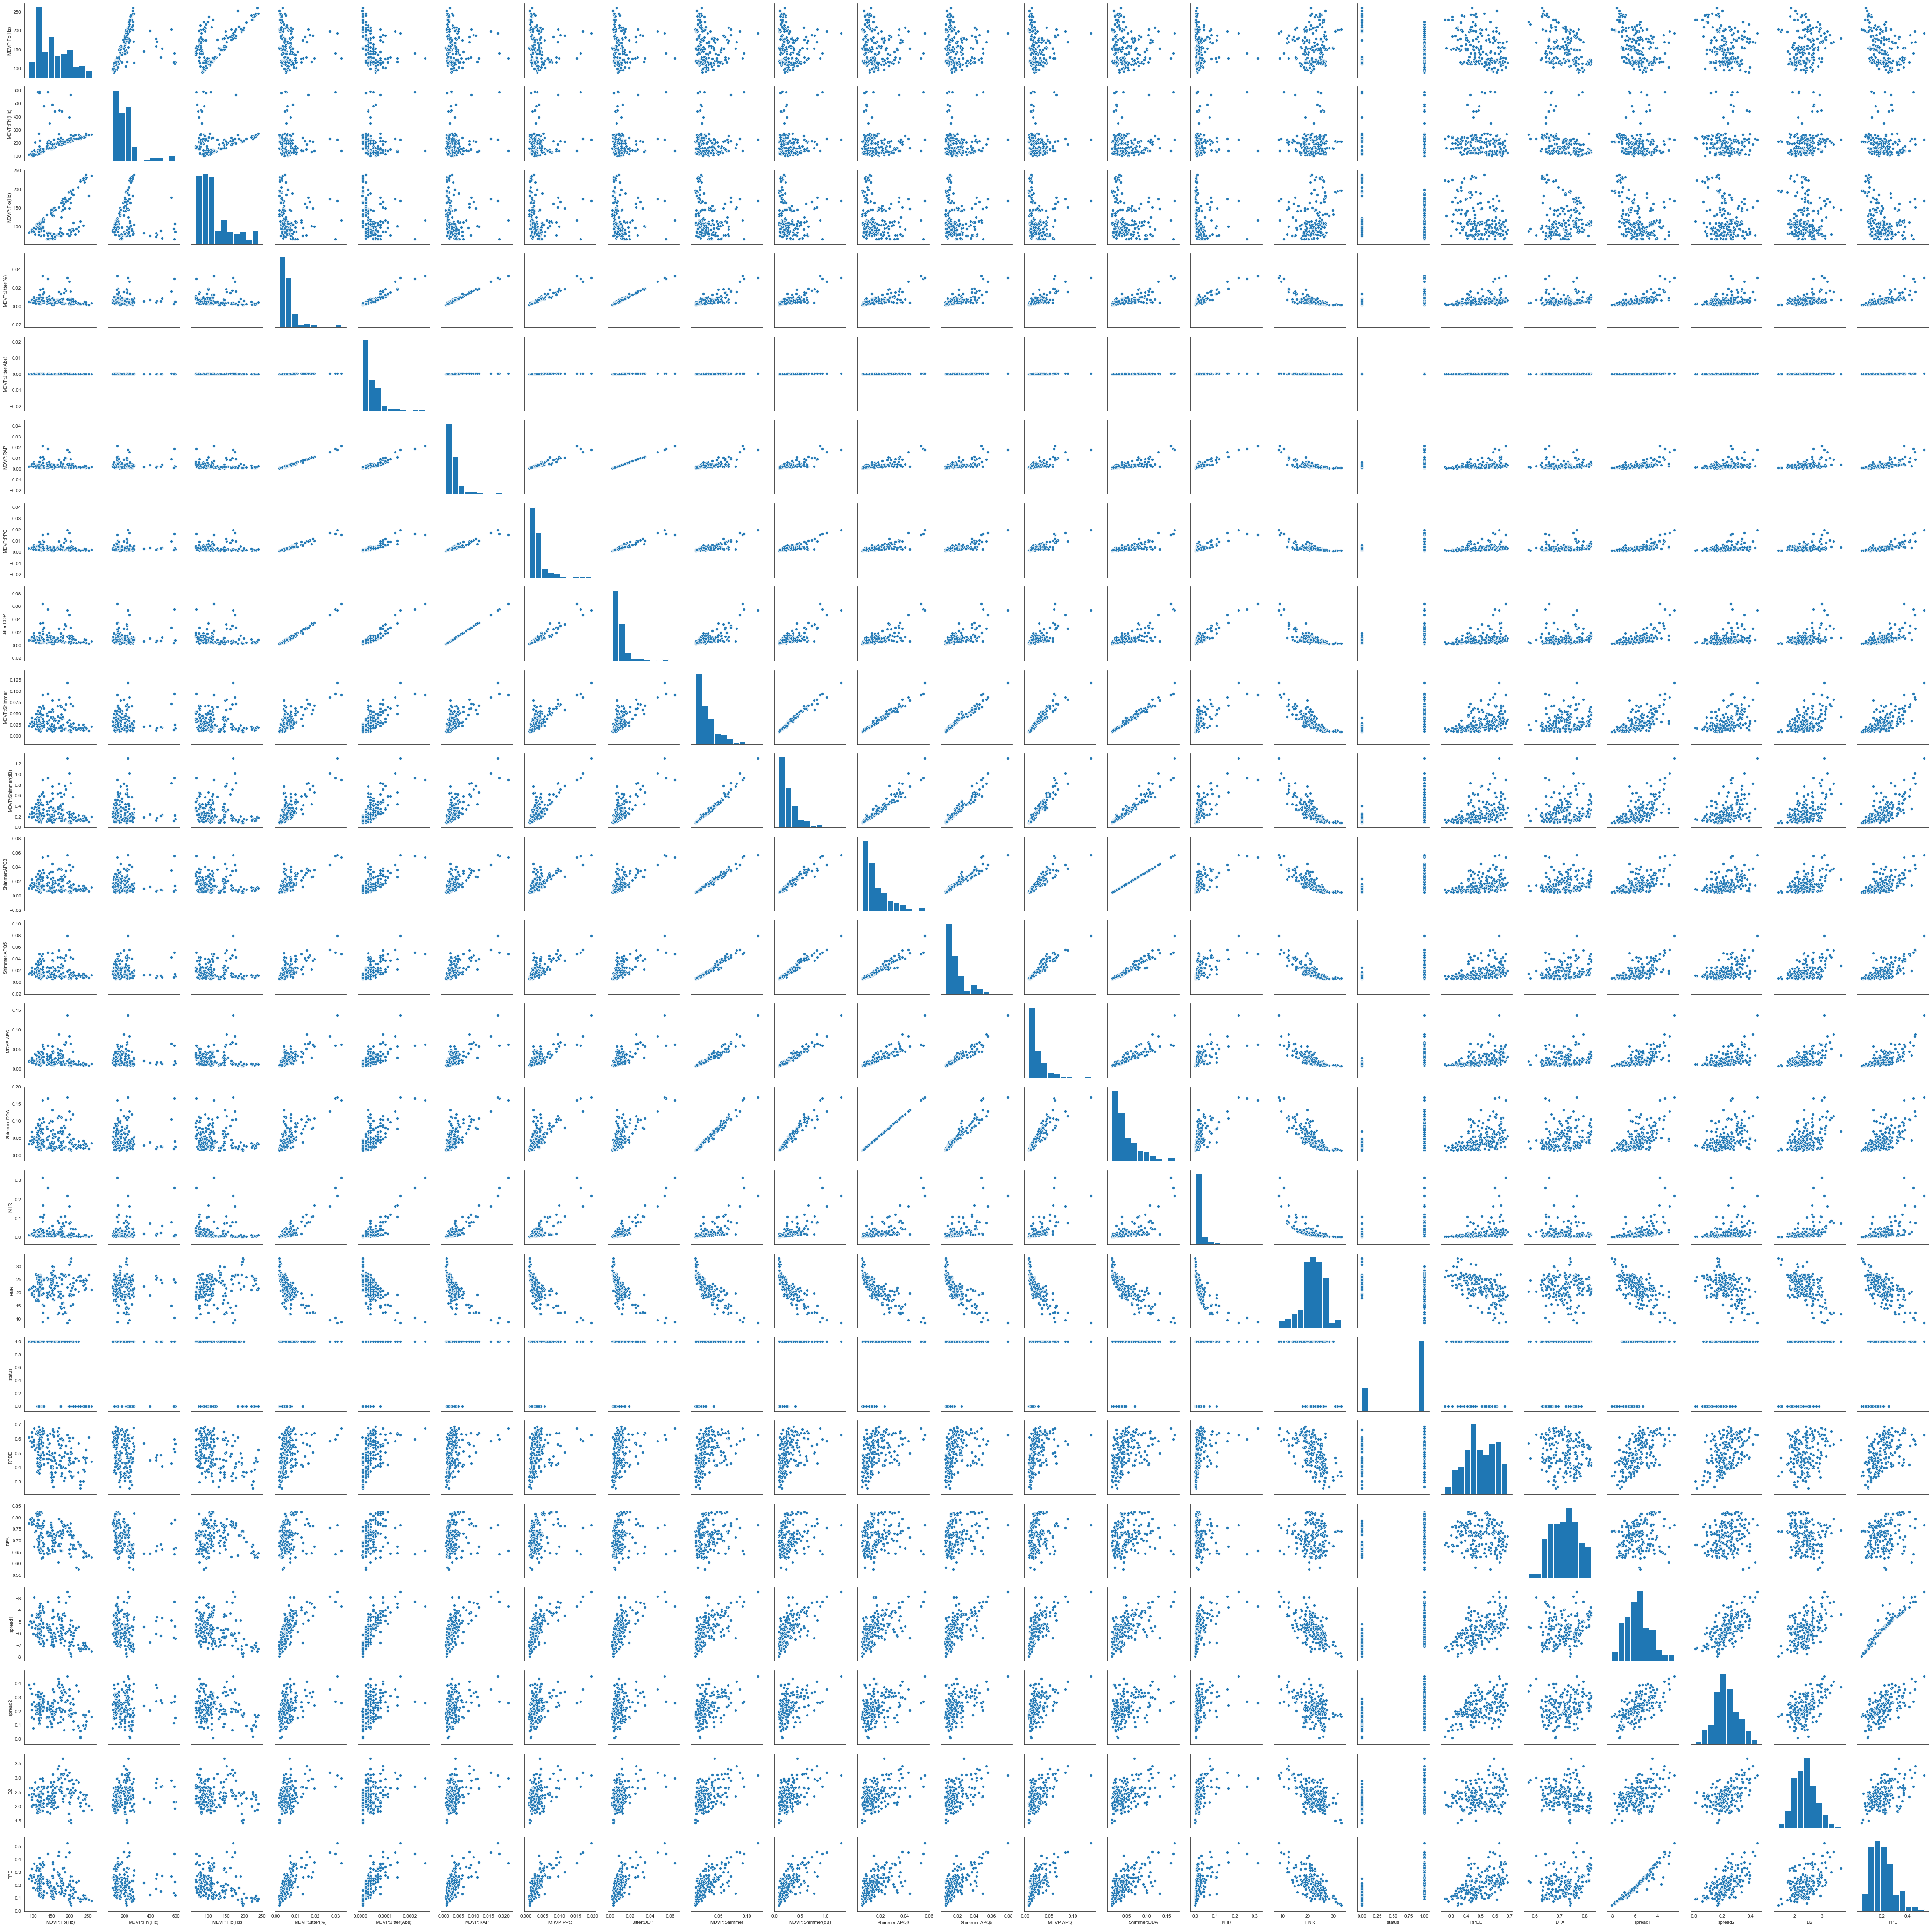

In [772]:
sns.pairplot(data)
plt.show()

- Jitter:DDP is highly correlated with the MDVP:Jitter(%), MDVP:RAP and MDVP:PPQ
- MDVP:APQ is highly correlated with the MDVP:Shimmer and MDVP:Shimmer(dB)
- MDVP:Jitter(%) is highly correlated with the MDVP:RAP, MDVP:PPQ and Jitter:DDP
- MDVP:PPQ is highly correlated with the MDVP:Jitter(%), MDVP:RAP and Jitter:DDP
- MDVP:RAP is highly correlated with the MDVP:Jitter(%), MDVP:PPQ and Jitter:DDP
- MDVP:Shimmer is highly correlated with the MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ and Shimmer:DDA
- MDVP:Shimmer(dB) is highly correlated with the MDVP:Shimmer, Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ and	Shimmer:DDA
- Shimmer:APQ3  is highly correlated with the MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ5 and Shimmer:DDA
- Shimmer:APQ5 is highly correlated with the MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3 and Shimmer:DDA
- Shimmer:DDA is highly correlated with the MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3 amd Shimmer:APQ5
- PPE  is highly correlated with the spread1

We will drop below-mentioned features for model building<br/>
- MDVP:Shimmer(dB)
- Shimmer:APQ3
- Shimmer:APQ5
- MDVP:APQ
- Shimmer:DDA
- MDVP:RAP	
- MDVP:PPQ
- Jitter:DDP
- spread1




In [773]:
data.drop(columns=['MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 
                   'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP','spread1'], inplace=True, axis=1)

### 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

#### Prepare data for training
- **Seperate Predictors from the target**
- **Split the data into test and train sets**

In [774]:
# Predictors
X = data.drop(columns=['status'], axis=1) 

# target
y = data['status']

# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, stratify = y, test_size=0.30)

### 5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc

- **Standardize the continuous attributes**

In [775]:
# fitting a scaler function to scale test and train to avoid data leakage aka to keep the sanctity of the test data

scaler = StandardScaler()   # A scaler function

#fitting the scaler function with train set
scaler.fit(X_train.loc[:,['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread2', 'D2', 'PPE']])

X_train_scaled = scaler.transform(X_train.loc[:,['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread2', 'D2', 'PPE']])

X_test_scaled = scaler.transform(X_test.loc[:,['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread2', 'D2', 'PPE']])

X_train.loc[:,['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread2', 'D2', 'PPE']] = X_train_scaled 

X_test.loc[:,['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread2', 'D2', 'PPE']] = X_test_scaled

### 6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data

In [776]:
# Since we will be using multiple models using the same data, thhe following is a user defined function for that purpose 

def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    from sklearn import metrics
    
    model.fit(X_train, y_train)   # fir the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    score = round(model.score(X_test, y_test), 3)   # compute accuracy score for test set


    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  # compute the confusion matrix from the predictions and actuals

    recall = round(tp/(tp+fn), 3)   
    precision = round(tp/(tp+fp), 3)  
    specificity =round(tn/(tn+fp),3) 
    f1_score =  round(2*precision*recall/(precision + recall), 3)
    
    return score, recall, precision, specificity, f1_score  # return all the metrics

In [777]:
lr = LogisticRegression(solver = 'liblinear')  # 
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb, X_train, X_test, y_train, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm, X_train, X_test, y_train, y_test )

In [778]:
result1 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                      'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                      'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                      'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                      'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                      'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
 
result1.sort_values(by=['Accuracy', 'F1 Score'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
1,KNN,0.915,0.977,0.915,0.733,0.945
3,SVM,0.864,0.977,0.860,0.533,0.915
0,Logistic Regression,0.864,0.932,0.891,0.667,0.911
2,Naive Bayes',0.729,0.705,0.912,0.800,0.795


### 7. Train a meta-classifier and note the accuracy on test data

In [779]:
knnc = KNeighborsClassifier(n_neighbors=5)
rfc = RandomForestClassifier(random_state=1, n_estimators = 50)
nbc = GaussianNB()
abc = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
bgc = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
lrc = LogisticRegression(solver = 'liblinear')

sclf = StackingClassifier(classifiers=[knnc, rfc, nbc, abc, bgc], 
                          meta_classifier=lrc, use_probas=True)

print('3-fold cross validation:\n')

for clf, label in zip([knnc, rfc, nbc, abc, bgc, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'AdaBoost',
                       'Bagging',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.76 (+/- 0.06) [KNN]
Accuracy: 0.84 (+/- 0.05) [Random Forest]
Accuracy: 0.75 (+/- 0.01) [Naive Bayes]
Accuracy: 0.81 (+/- 0.05) [AdaBoost]
Accuracy: 0.84 (+/- 0.06) [Bagging]
Accuracy: 0.84 (+/- 0.06) [StackingClassifier]


### 8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy

In [780]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 50)
rf_accuracy, rf_recall, rf_precision, rf_specificity, rf_f1_score = fit_n_print(rf, X_train, X_test, y_train, y_test)

# AdaBoost Classifier
ab = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
ab_accuracy, ab_recall, ab_precision, ab_specificity, ab_f1_score = fit_n_print(ab, X_train, X_test, y_train, y_test)

# Bagging Classifier
bg = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bg_accuracy, bg_recall, bg_precision, bg_specificity, bg_f1_score = fit_n_print(bg, X_train, X_test, y_train, y_test)

In [781]:
result2 = pd.DataFrame({'Model' : ['Random Forest', 'AdaBoost', 'Bagging'],
                      'Accuracy': [ rf_accuracy, ab_accuracy, bg_accuracy ],
                      'Recall' : [rf_recall , ab_recall, bg_recall ],
                      'Precision': [rf_precision , ab_precision, bg_precision ],
                      'Specificity': [rf_specificity , ab_specificity, bg_specificity ],
                      'F1 Score' : [rf_f1_score, ab_f1_score, bg_f1_score]})
 
result2.sort_values(by=['Accuracy', 'F1 Score'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
2,Bagging,0.949,1.000,0.936,0.800,0.967
0,Random Forest,0.915,0.977,0.915,0.733,0.945
1,AdaBoost,0.881,0.977,0.878,0.600,0.925


### 9. Compare all the models (minimum 5) and pick the best one among them

In [782]:
result1.set_index('Model', inplace = True)
result2.set_index('Model', inplace = True)

In [783]:
all_models = pd.concat([result1, result2])
all_models.sort_values(by=['Accuracy', 'F1 Score'], axis=0, ascending=False, kind='quicksort')

,Accuracy,Recall,Precision,Specificity,F1 Score
Model,,,,,
Bagging,0.949,1.000,0.936,0.800,0.967
KNN,0.915,0.977,0.915,0.733,0.945
Random Forest,0.915,0.977,0.915,0.733,0.945
AdaBoost,0.881,0.977,0.878,0.600,0.925
SVM,0.864,0.977,0.860,0.533,0.915
Logistic Regression,0.864,0.932,0.891,0.667,0.911
Naive Bayes',0.729,0.705,0.912,0.800,0.795


Bagging seems to be the go-to model for this dataset.